Họ và tên : Nguyễn Minh Phú

MSSV : 20280072

Wholesale customers là dataset phục vụ cho bài toán customer segmentation dựa vào một số thông tin và hành vi của khách hàng 
- Đọc dữ liệu
- Trực quan hóa dữ liệu
- Chuẩn hóa dữ liệu 
- Dùng elbow method để chọn ra số clusters thích hợp (có thể chọn số clusters $\pm1$ để so sánh sự khác biệt)
- Biểu diễn các cụm sang không gian 2 chiều và 3 chiều
- Chọn ra một số data samples theo từng cụm để phân tích các giá trị trong đó 

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem. 
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

# Load Dataset

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.cluster import KMeans
from pywaffle import Waffle
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score


C:\Users\Phu\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  """


In [2]:
df = pd.read_csv("Clustered_Customer_Data.csv")

In [3]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4474.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.442011
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.373951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,2237.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,4474.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,2.000000
75%,6711.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,3.000000
max,8949.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [7]:
df.isnull().sum().sort_values(ascending=False)


BALANCE                             0
BALANCE_FREQUENCY                   0
TENURE                              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
Cluster                             0
dtype: int64

# Data Analysis

In [8]:
ProfileReport(df, title='Credit Card Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#FFCC00'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

#### Nhiều variables chứa rất nhiều giá trị 0. (Phân phối có dạng lệch phải)

#### Người dùng có xu hướng charge thẻ tín dụng phần lớn ở khoảng 12 tháng dựa vào histogram của biến Tenure đồng nghĩa là hoàn trả các khoản nợ tín dụng trong thời gian dài với lãi suất cao hơn 

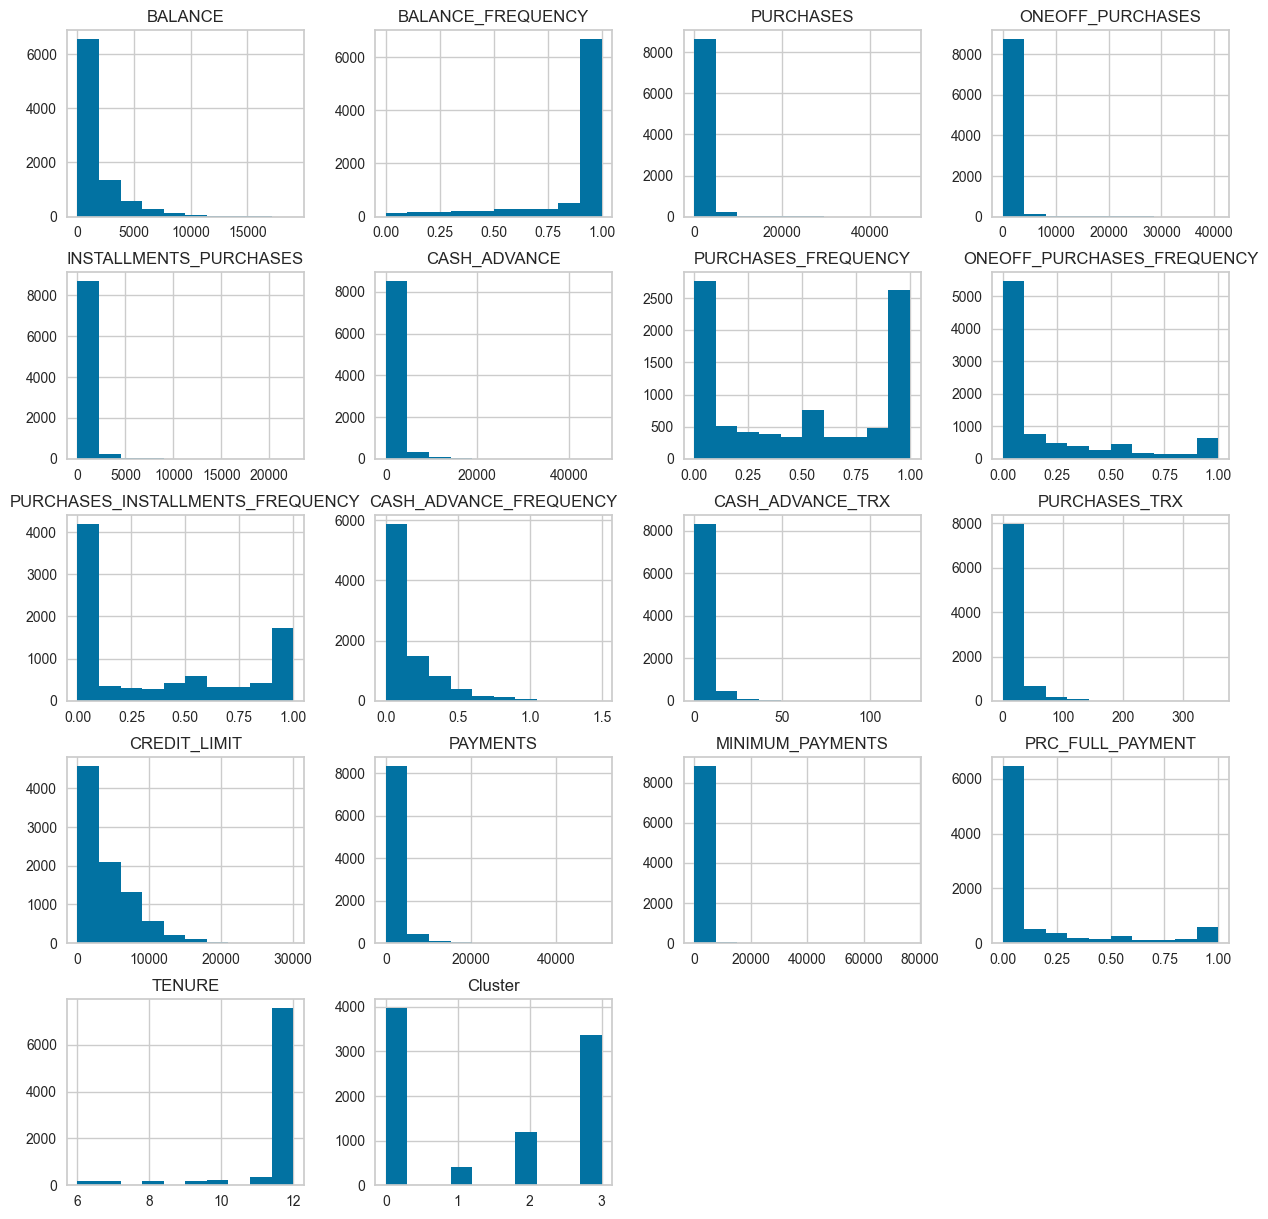

In [9]:
%matplotlib inline
df.hist(figsize=(15, 15))
plt.show()

C:\Users\Phu\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  if sys.path[0] == "":


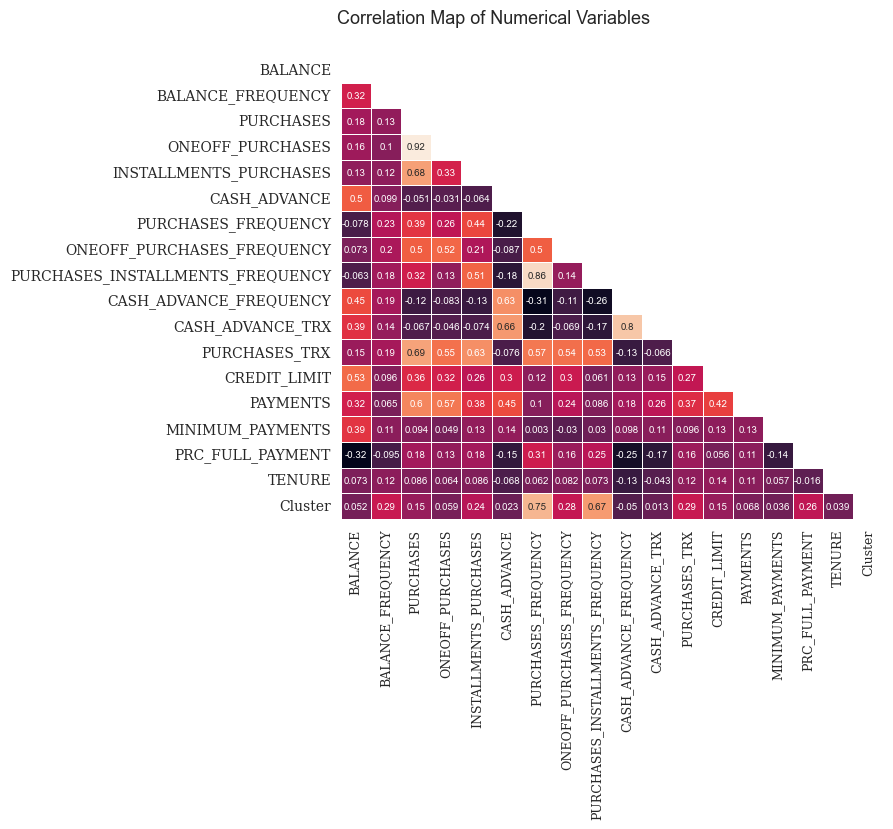

In [10]:

%matplotlib inline
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df.corr(), mask=mask, annot=True, linewidths=0.5, cbar=False, annot_kws={"size": 7})
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, size=9, fontfamily='serif')
ax.set_yticklabels(ylabels, size=10, fontfamily='serif')
plt.suptitle('Correlation Map of Numerical Variables', x=0.12, y=0.96, ha='left', fontsize=13
             )

plt.tight_layout(rect=[0, 0.5, 1., 1.01])
plt.show()

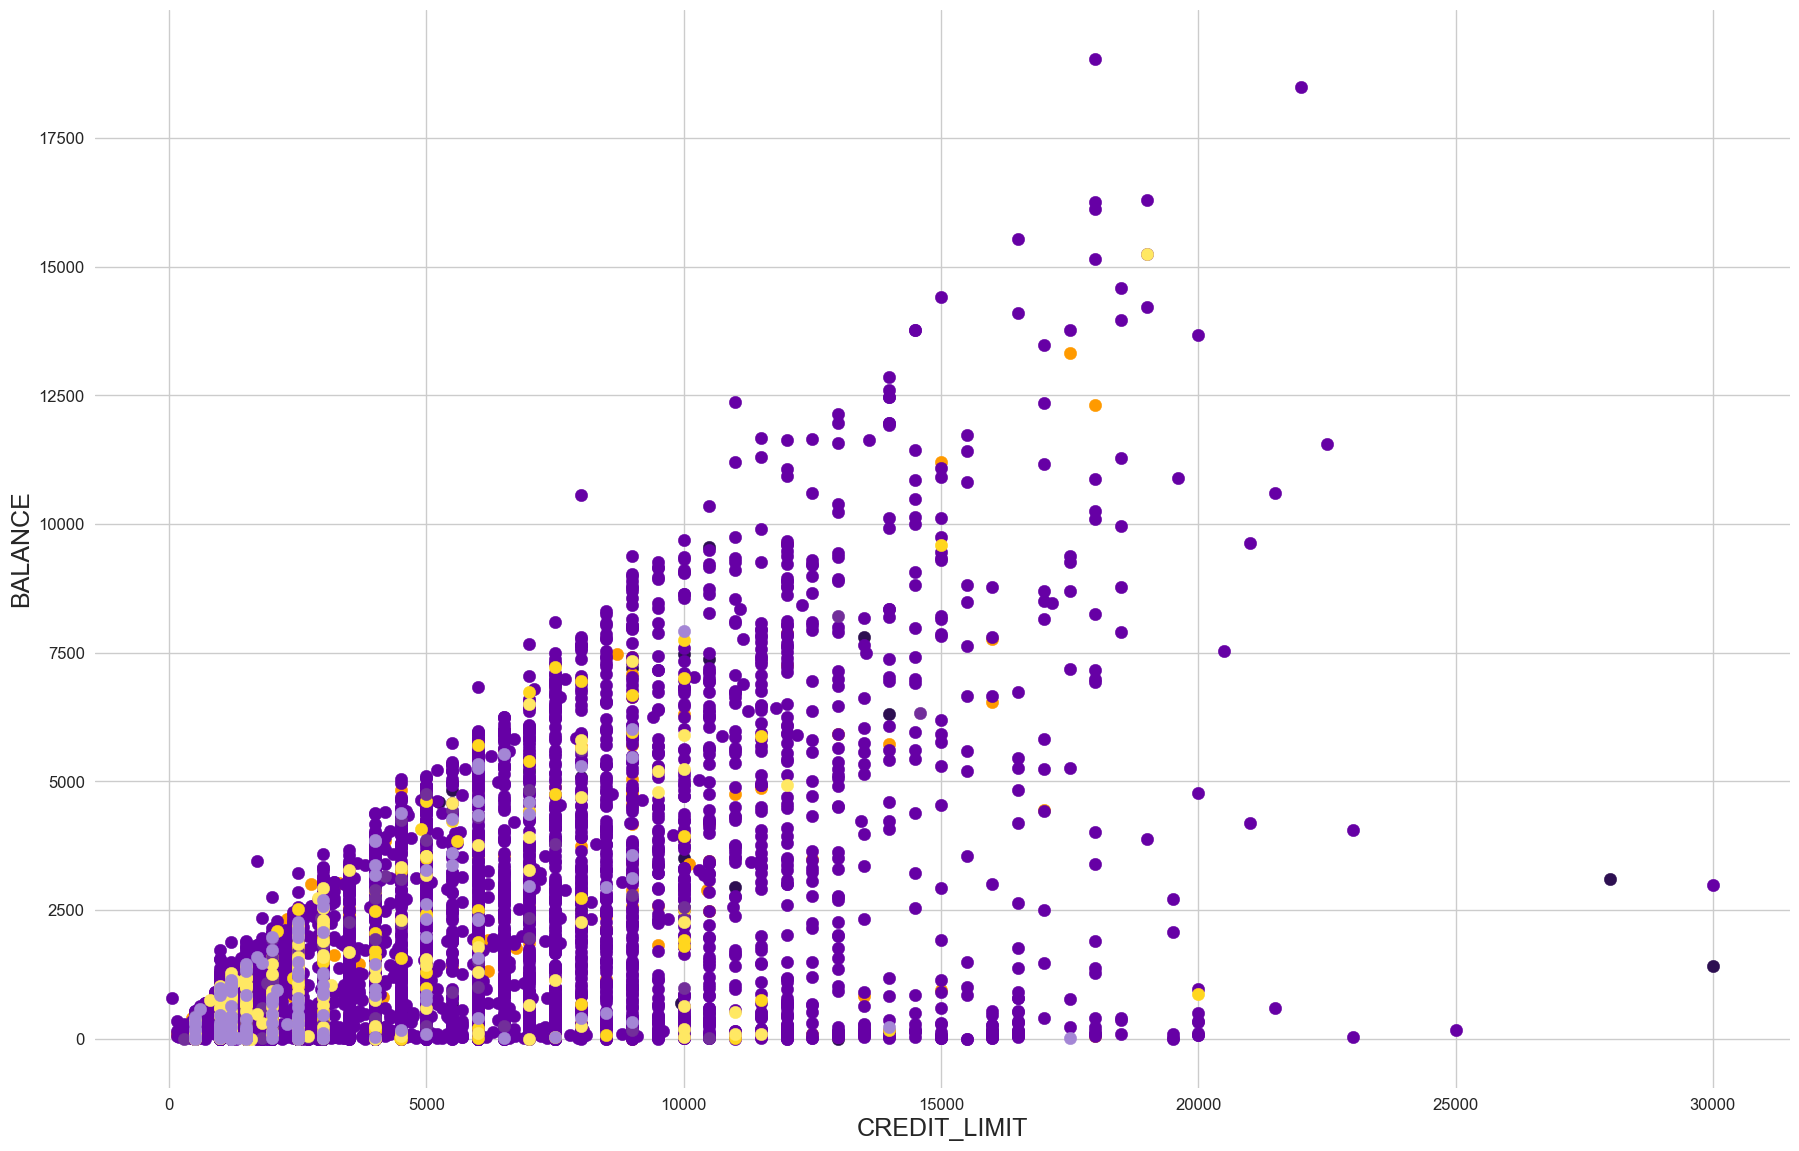

In [11]:
%matplotlib inline

color_pallete=['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']

Credit_Balance = df[['CREDIT_LIMIT', 'BALANCE', 'TENURE']].copy()
Credit_Balance.loc[:, 'TENURE'] = Credit_Balance['TENURE'].astype(str)
tenure = sorted(Credit_Balance['TENURE'].unique())


fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(7, 7)
ax = fig.add_subplot(gs[:, :7])
ax.set_aspect(1)

for x in range(len(tenure)):
    Credit_Balance_x = Credit_Balance[Credit_Balance['TENURE'] == tenure[x]]
    ax.scatter(Credit_Balance_x['CREDIT_LIMIT'], Credit_Balance_x['BALANCE'], s=80, color=color_pallete[x])

ax.set_xlabel('CREDIT_LIMIT',fontsize=18)
ax.set_ylabel('BALANCE',fontsize=18 )

for spine in ax.spines.values():
    spine.set_color('None')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


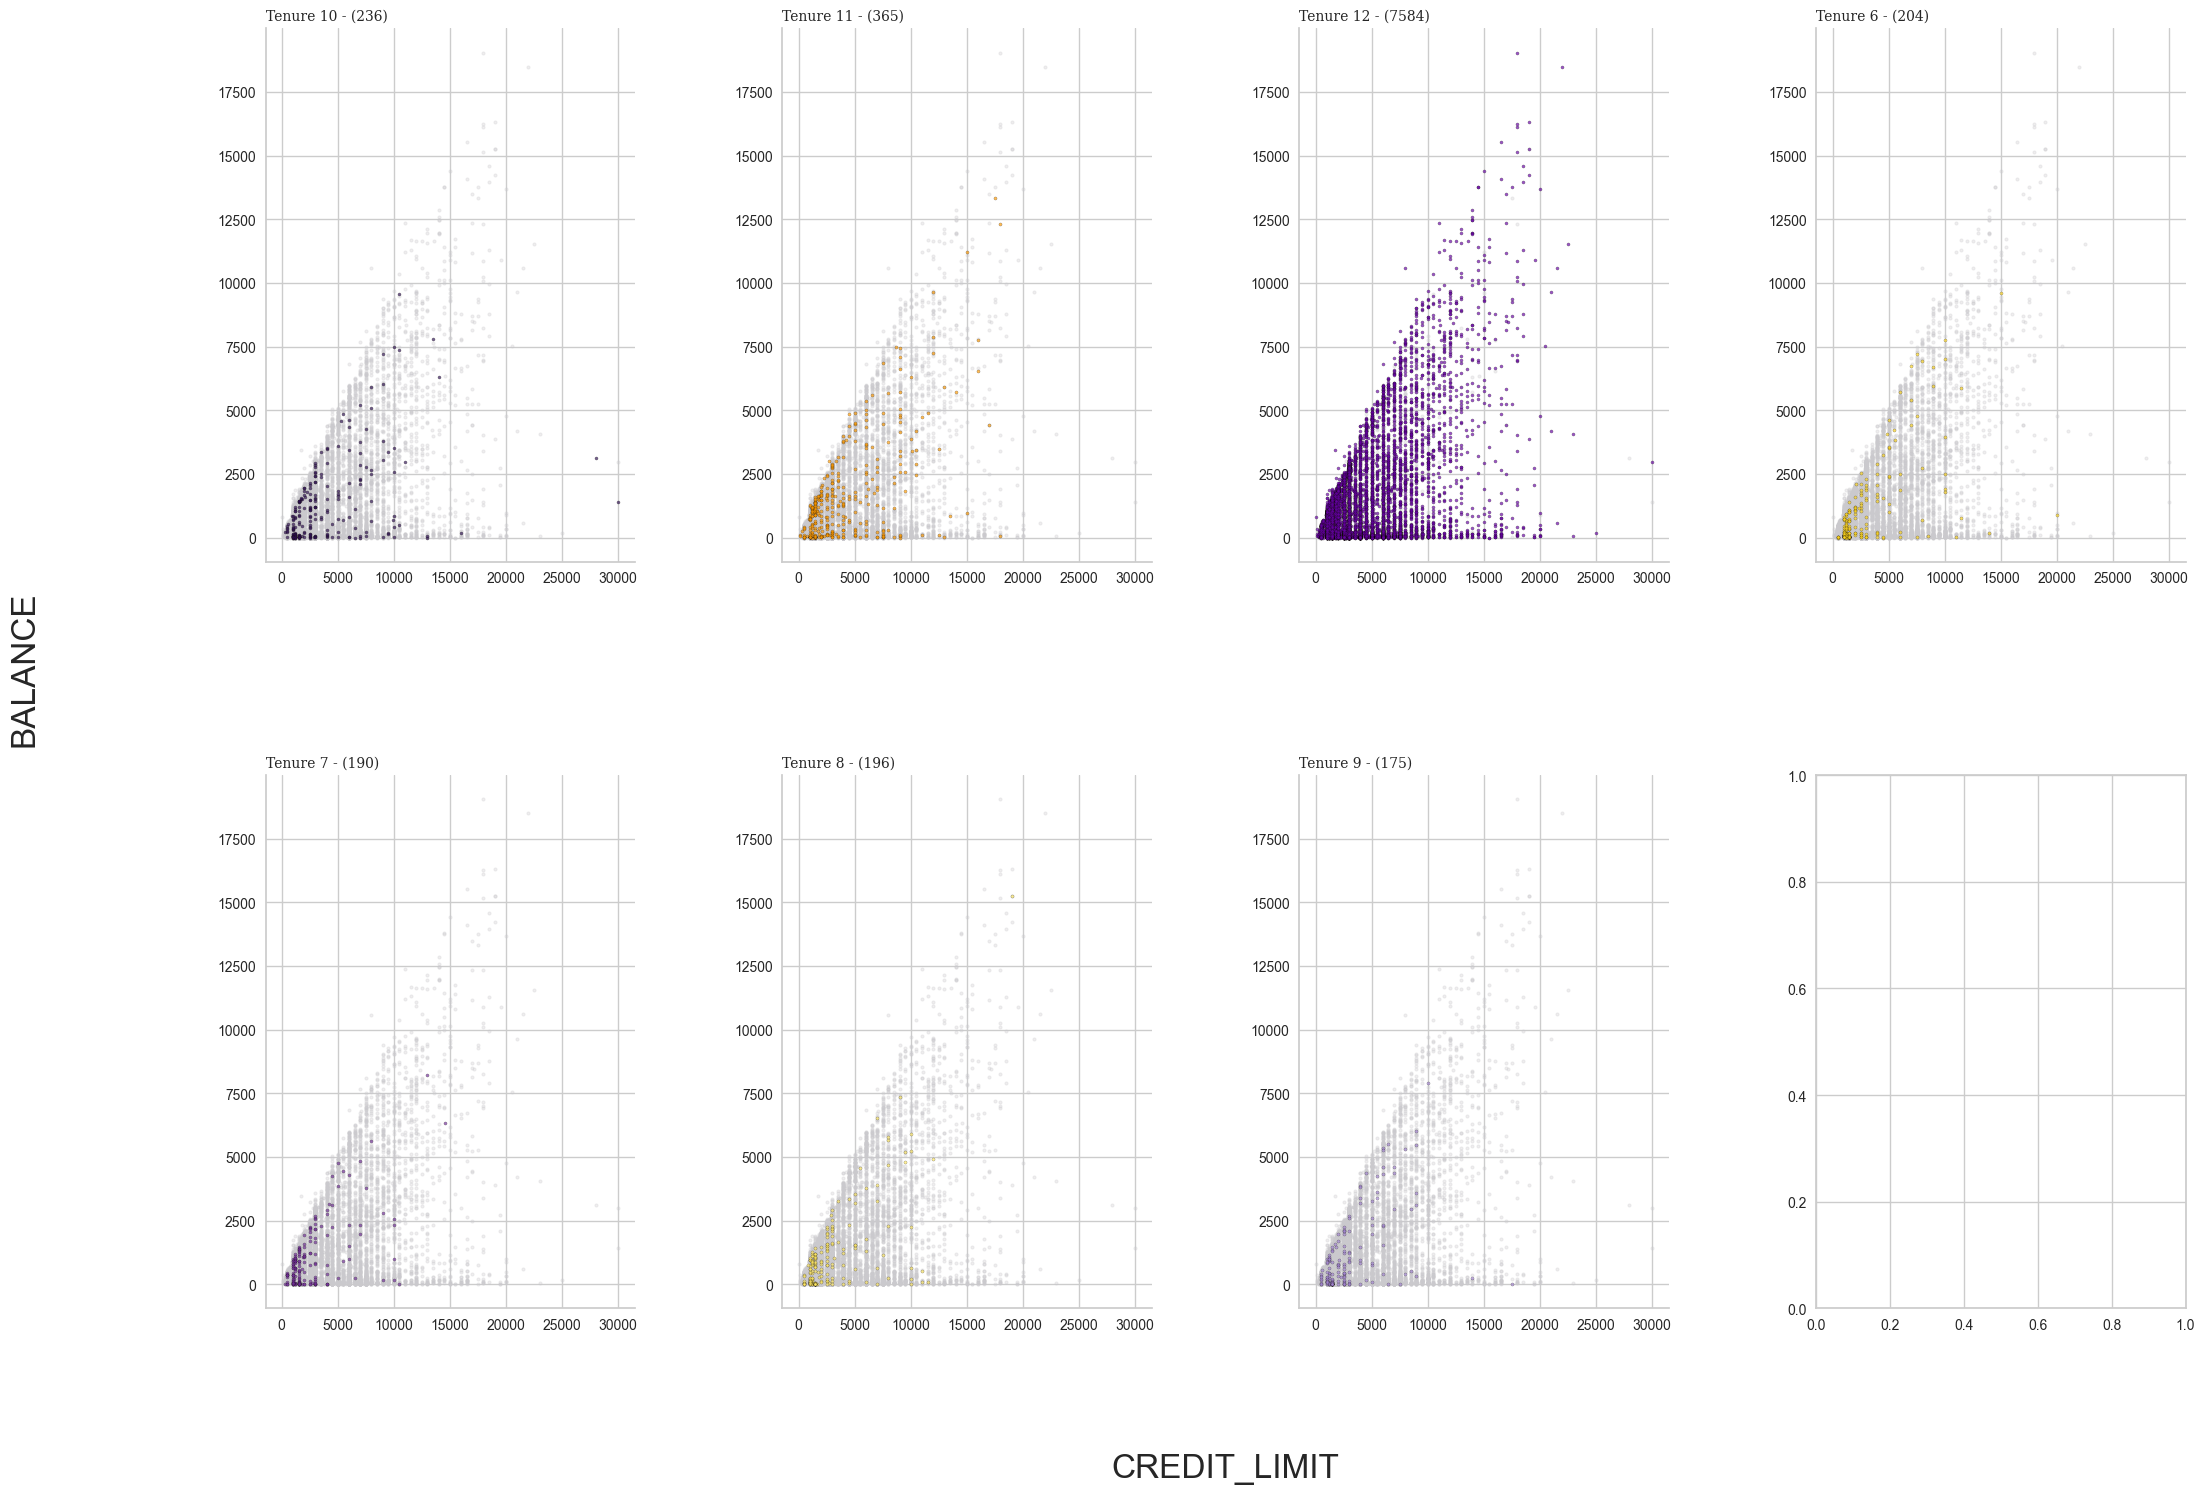

In [12]:
%matplotlib inline

color_palette = ['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']

Credit_Balance = df[['CREDIT_LIMIT', 'BALANCE', 'TENURE']].copy()

Credit_Balance.loc[:, 'TENURE'] = Credit_Balance['TENURE'].astype(str)
tenure = sorted(Credit_Balance['TENURE'].unique())
fig, sub_axes = plt.subplots(2, 4, figsize=(24, 16))

for idx, tnr in enumerate(tenure):
    row = idx // 4
    col = idx % 4

    sub_axes[row, col].scatter(Credit_Balance[Credit_Balance['TENURE'] != tnr]['CREDIT_LIMIT'], Credit_Balance[Credit_Balance['TENURE'] != tnr]['BALANCE'], label=tnr, s=5, alpha=0.3, linewidth=0.75, color='#CAC9CD')
    sub_axes[row, col].scatter(Credit_Balance[Credit_Balance['TENURE'] == tnr]['CREDIT_LIMIT'], Credit_Balance[Credit_Balance['TENURE'] == tnr]['BALANCE'], color=color_palette[idx], label=tnr, s=5, alpha=0.65, linewidth=0.2, edgecolor='#100C07')

    cnt = (Credit_Balance['TENURE'] == tnr).sum()
    sub_axes[row, col].set_title(f'Tenure {tnr} - ({cnt})', loc='left', fontsize=10, fontfamily='serif')

    sub_axes[row, col].spines['right'].set_visible(False)
    sub_axes[row, col].spines['top'].set_visible(False)

plt.text(0.5, -1e-5, 'CREDIT_LIMIT', ha='center', va='center', transform=fig.transFigure, fontsize=24)
plt.text(-1e-5, 0.5, 'BALANCE', ha='center', va='center', transform=fig.transFigure, fontsize=24, rotation='vertical')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show(block=False)


Khách hàng với Tenure 12 chiếm phần lớn tỷ trọng của Balance với Credit_Limit so với các Tenure còn lại.

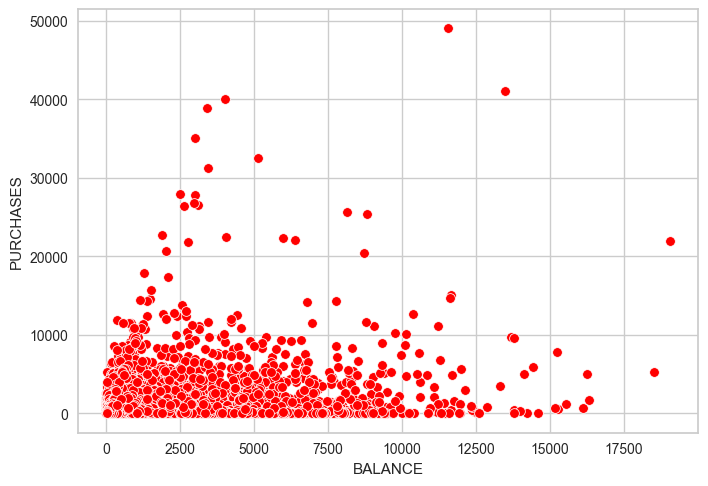

In [13]:
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df,color='red');


# Data Preprocessing

In [14]:
data = df.copy()

In [15]:
null_columns = data.columns[data.isnull().any()].tolist()

# Kiểm tra xem cột 'column_name' có giá trị null hay không
if null_columns:
    imputer = KNNImputer()
    df_imp = pd.DataFrame(imputer.fit_transform(data[null_columns]), columns=null_columns)
    data = data.fillna(df_imp)



In [16]:


# Assuming you have a dataframe named 'df'

# Perform PCA and calculate the explained variance ratio for different n_components
n_components = [1, 2, 3, 4, 5]
explained_variances = []
top_contributing_columns = []

for i in n_components:
    pca = PCA(n_components=i)
    pca.fit(df)
    explained_variances.append(sum(pca.explained_variance_ratio_))
    top_components = pca.components_
    top_columns = df.columns[np.argsort(np.array(pca.components_))[:, -5:]]
    top_contributing_columns.append(top_columns.tolist())

# Create a dataframe to store the results
results_df = pd.DataFrame({'n_components': n_components, 'explained_variance': explained_variances, 'top_contributing_columns': top_contributing_columns})

print(results_df)


   n_components  explained_variance  \
0             1            0.475291   
1             2            0.653079   
2             3            0.792854   
3             4            0.906471   
4             5            0.954660   

                            top_contributing_columns  
0  [[CASH_ADVANCE, BALANCE, PURCHASES, PAYMENTS, ...  
1  [[CASH_ADVANCE, BALANCE, PURCHASES, PAYMENTS, ...  
2  [[CASH_ADVANCE, BALANCE, PURCHASES, PAYMENTS, ...  
3  [[CASH_ADVANCE, BALANCE, PURCHASES, PAYMENTS, ...  
4  [[CASH_ADVANCE, BALANCE, PURCHASES, PAYMENTS, ...  


C:\Users\Phu\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
C:\Users\Phu\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
C:\Users\Phu\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
C:\Users\Phu\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecate

Các nhân tố chính trong mẫu dữ liệu của ta quyết định các phương sai cũng như ý nghĩa dữ liệu lần lượt là :CASH_ADVANCE, BALANCE, PURCHASES, PAYMENTS

# Feature Engineering

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)

In [18]:
pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(scaled_data)

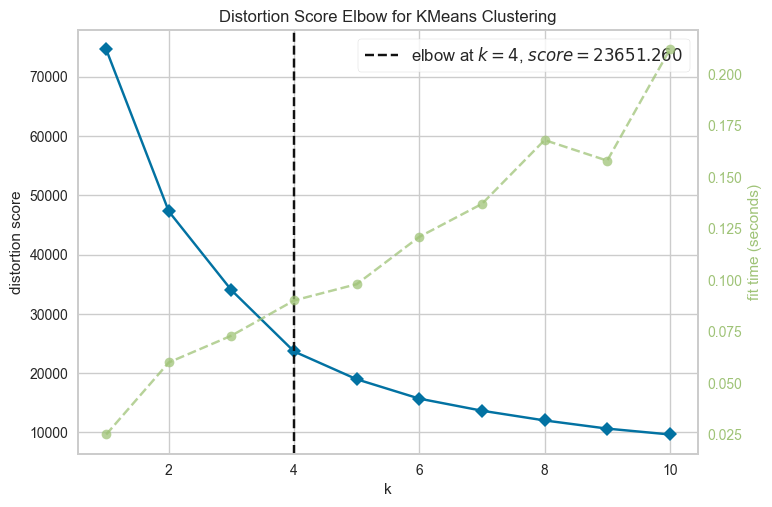

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:

elbow_method = KElbowVisualizer(KMeans(), k=(1,11))
elbow_method.fit(X)
elbow_method.show()

## Dựa vào elbow method ta có thể chọn số cluster = 4

# Model Part

In [20]:
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500)
y_kmeans = kmeans.fit_predict(X)

In [21]:
kmeans.labels_

array([3, 1, 0, ..., 0, 3, 3])

In [22]:
kmeans.predict(X)

array([3, 1, 0, ..., 0, 3, 3])

In [23]:
kmeans.cluster_centers_

array([[ 1.16259185, -1.20875013],
       [-0.50839241,  3.36819748],
       [ 5.40511567,  0.92047073],
       [-1.60649005, -0.18277464]])

In [24]:
pca = PCA(n_components=3) #dùng pca 3 thành phần
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])#tạo ra dataframe với 3 thành phàn là pca1, pca2, và pca3

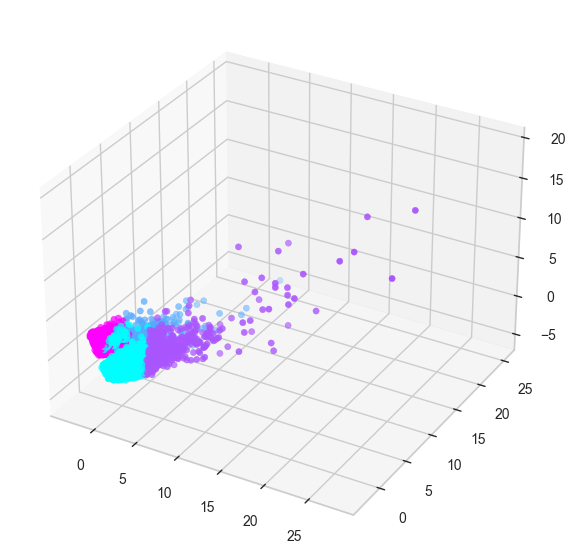

In [25]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=kmeans.labels_, cmap="cool")
plt.show()

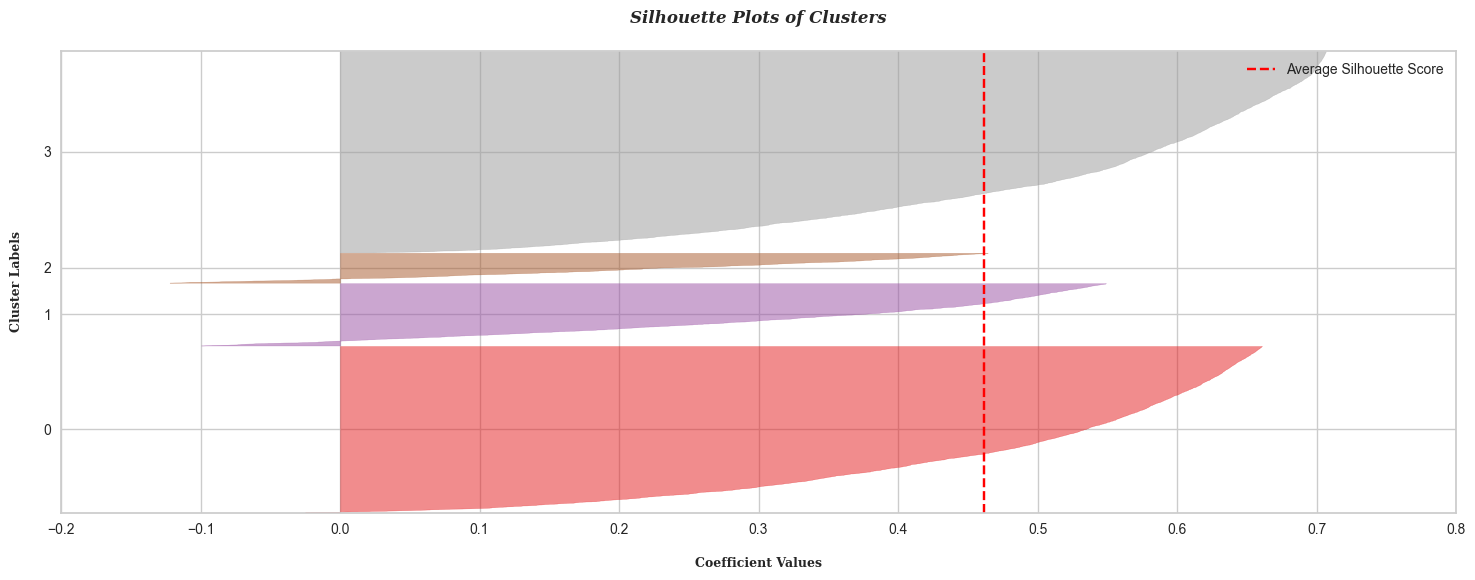

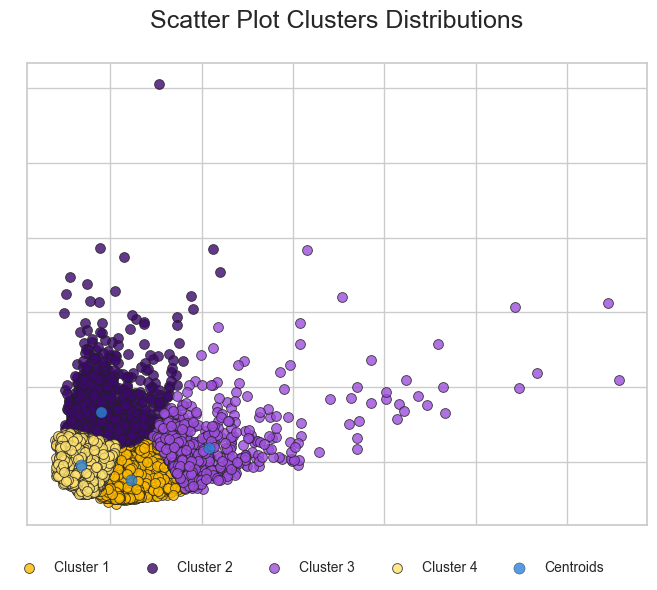

<Figure size 800x550 with 0 Axes>

In [26]:


def scatter_plot_clusters(X, kmeans, y_kmeans):
    cluster_colors = ['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Centroids']

    fig, ax = plt.subplots(figsize=(8, 6))
    
    for i, color in enumerate(cluster_colors):
        ax.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, c=color, alpha=0.8,linewidth=0.65, edgecolor='#212121')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=65, c='#2C81D9', label='Centroids', alpha=0.8, edgecolor='#212121')
    
    ax.set_title('Scatter Plot Clusters Distributions\n', fontsize=18)
    ax.legend(labels, bbox_to_anchor=(0.95, -0.05), ncol=5 , fontsize=10)
    ax.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_color('#CAC9CD')

    plt.show()

def visualizer(kmeans, y_kmeans):
    title = {'fontsize': 12, 'fontweight': 'bold', 'style': 'italic', 'fontfamily': 'serif'}
    text_style = {'fontweight': 'bold', 'fontfamily': 'serif'}
    
    fig, ax1 = plt.subplots(1, 1, figsize=(18, 6))
    
    s_viz = SilhouetteVisualizer(kmeans, ax=ax1,)
    s_viz.fit(X)
    s_viz.finalize()
    s_viz.ax.set_title('Silhouette Plots of Clusters\n', **title)


    s_viz.ax.set_xlabel('\nCoefficient Values', fontsize=9, **text_style)
    s_viz.ax.set_ylabel('Cluster Labels\n', fontsize=9, **text_style)
        
    scatter_plot_clusters(X, kmeans, y_kmeans)


   
    plt.suptitle('Credit Card Customer Clustering using K-Means\n', fontsize=14, **text_style)
    plt.show()

# Calling K-Means Functions
visualizer(kmeans, y_kmeans)


Model Kmeans với cluster = 3 để ta so sánh

In [27]:
kmeans_3 = KMeans(n_clusters=3, random_state=32, max_iter=500)
y_kmeans_3 = kmeans_3.fit_predict(X)

In [28]:

def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print('.: Evaluate Clustering Quality :.')
    print('*' * 34)
    print('.: Davies-Bouldin Index: ', db_index)
    print('.: Silhouette Score: ', s_score)
    print('.: Calinski Harabasz Index: ', ch_index)
    return db_index, s_score, ch_index

# --- Evaluate K-Means Cluster Quality ---
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(X, y_kmeans)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.769
.: Silhouette Score:  0.462
.: Calinski Harabasz Index:  6419.916


In [29]:
db_kmeans_3, ss_kmeans_3, ch_kmeans_3 = evaluate_clustering(X, y_kmeans_3)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.787
.: Silhouette Score:  0.44
.: Calinski Harabasz Index:  5342.114


Davies-Bouldin Index (DBI): Giá trị DBI càng thấp càng tốt, cho thấy sự tách biệt tốt hơn giữa các cụm và độ tương đồng giữa các cụm là thấp. Với số cụm là 4, DBI là 0.769, và với số cụm là 3, DBI là 0.787. Vì DBI của số cụm là 4 thấp hơn, có xu hướng tốt hơn.

Silhouette Score: Điểm silhouette càng gần 1 càng tốt, cho thấy sự tách biệt tốt hơn giữa các cụm. Với số cụm là 4, Silhouette Score là 0.462, và với số cụm là 3, Silhouette Score là 0.44. Vì Silhouette Score của số cụm là 4 cao hơn, có xu hướng tốt hơn.

Calinski Harabasz Index: Giá trị CHI càng cao càng tốt, cho thấy sự tách biệt tốt hơn giữa các cụm. Với số cụm là 4, CHI là 6419.916, và với số cụm là 3, CHI là 5342.114. Vì CHI của số cụm là 4 cao hơn, có xu hướng tốt hơn.

Dựa trên các độ đo chất lượng cụm được sử dụng, trong trường hợp này, số cụm là 4 cho thấy kết quả tốt hơn. Tuy DBI và Silhouette Score của số cụm là 4 không cao bằng số cụm là 3, nhưng CHI của số cụm là 4 lại cao hơn đáng kể. Vì vậy, tổng thể, số cụm là 4 có vẻ hợp lý hơn số cụm là 3 trong trường hợp này.

# Discussion & Conclusion

In [30]:
df['cluster_result'] = y_kmeans+1
df['cluster_result'] = 'Cluster '+df['cluster_result'].astype(str)

df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df.describe().loc[['mean']].T

df_cluster_summary = df.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')


df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient(cmap='YlOrBr').hide_index()

Column Name,Metrics,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Overall
BALANCE,mean,822.563905,4567.176336,3282.803513,992.271348,1564.474828
BALANCE_FREQUENCY,mean,0.927658,0.964313,0.987896,0.792232,0.877271
PURCHASES,mean,1160.795982,474.416936,6385.586523,238.462584,1003.204834
ONEOFF_PURCHASES,mean,562.149450,310.731623,4138.635146,178.784616,592.437371
INSTALLMENTS_PURCHASES,mean,598.854527,163.787183,2247.984079,60.007166,411.067645
CASH_ADVANCE,mean,175.587236,4446.844132,766.189534,599.622183,978.871112
PURCHASES_FREQUENCY,mean,0.872206,0.270982,0.957901,0.173327,0.490351
ONEOFF_PURCHASES_FREQUENCY,mean,0.283902,0.132087,0.711555,0.081428,0.202458
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.691747,0.167154,0.817604,0.087793,0.364437
CASH_ADVANCE_FREQUENCY,mean,0.036286,0.469504,0.088911,0.120094,0.135144


Cluster 1: Đặc điểm chung của cluster này là giá trị trung bình của các thuộc tính BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS và TENURE đều ở mức trung bình. Cluster này có giá trị PRC_FULL_PAYMENT cao hơn so với các cluster khác, cho thấy tỷ lệ thanh toán đầy đủ trong các giao dịch mua hàng có xu hướng cao hơn.

Cluster 2: Cluster này có giá trị trung bình của thuộc tính BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS và TENURE đều cao hơn so với các cluster khác. Điều này cho thấy các khách hàng trong cluster này có tổng số tiền dư trong tài khoản và các giao dịch mua hàng lớn hơn.

Cluster 3: Cluster này có giá trị trung bình của thuộc tính PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS và MINIMUM_PAYMENTS cao hơn so với các cluster khác. Điều này cho thấy các khách hàng trong cluster này có số lần mua hàng, số tiền mua hàng và giao dịch tiền mặt trung bình cao hơn.

Cluster 4: Cluster này có giá trị trung bình của thuộc tính BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS và TENURE ở mức thấp nhất so với các cluster khác. Điều này cho thấy các khách hàng trong cluster này có các hoạt động mua hàng và sử dụng tiền mặt ít hơn so với các cluster khác.

Chúng ta sẽ đi sâu hơn về tính chất định danh của từng khách hàng bên dưới.

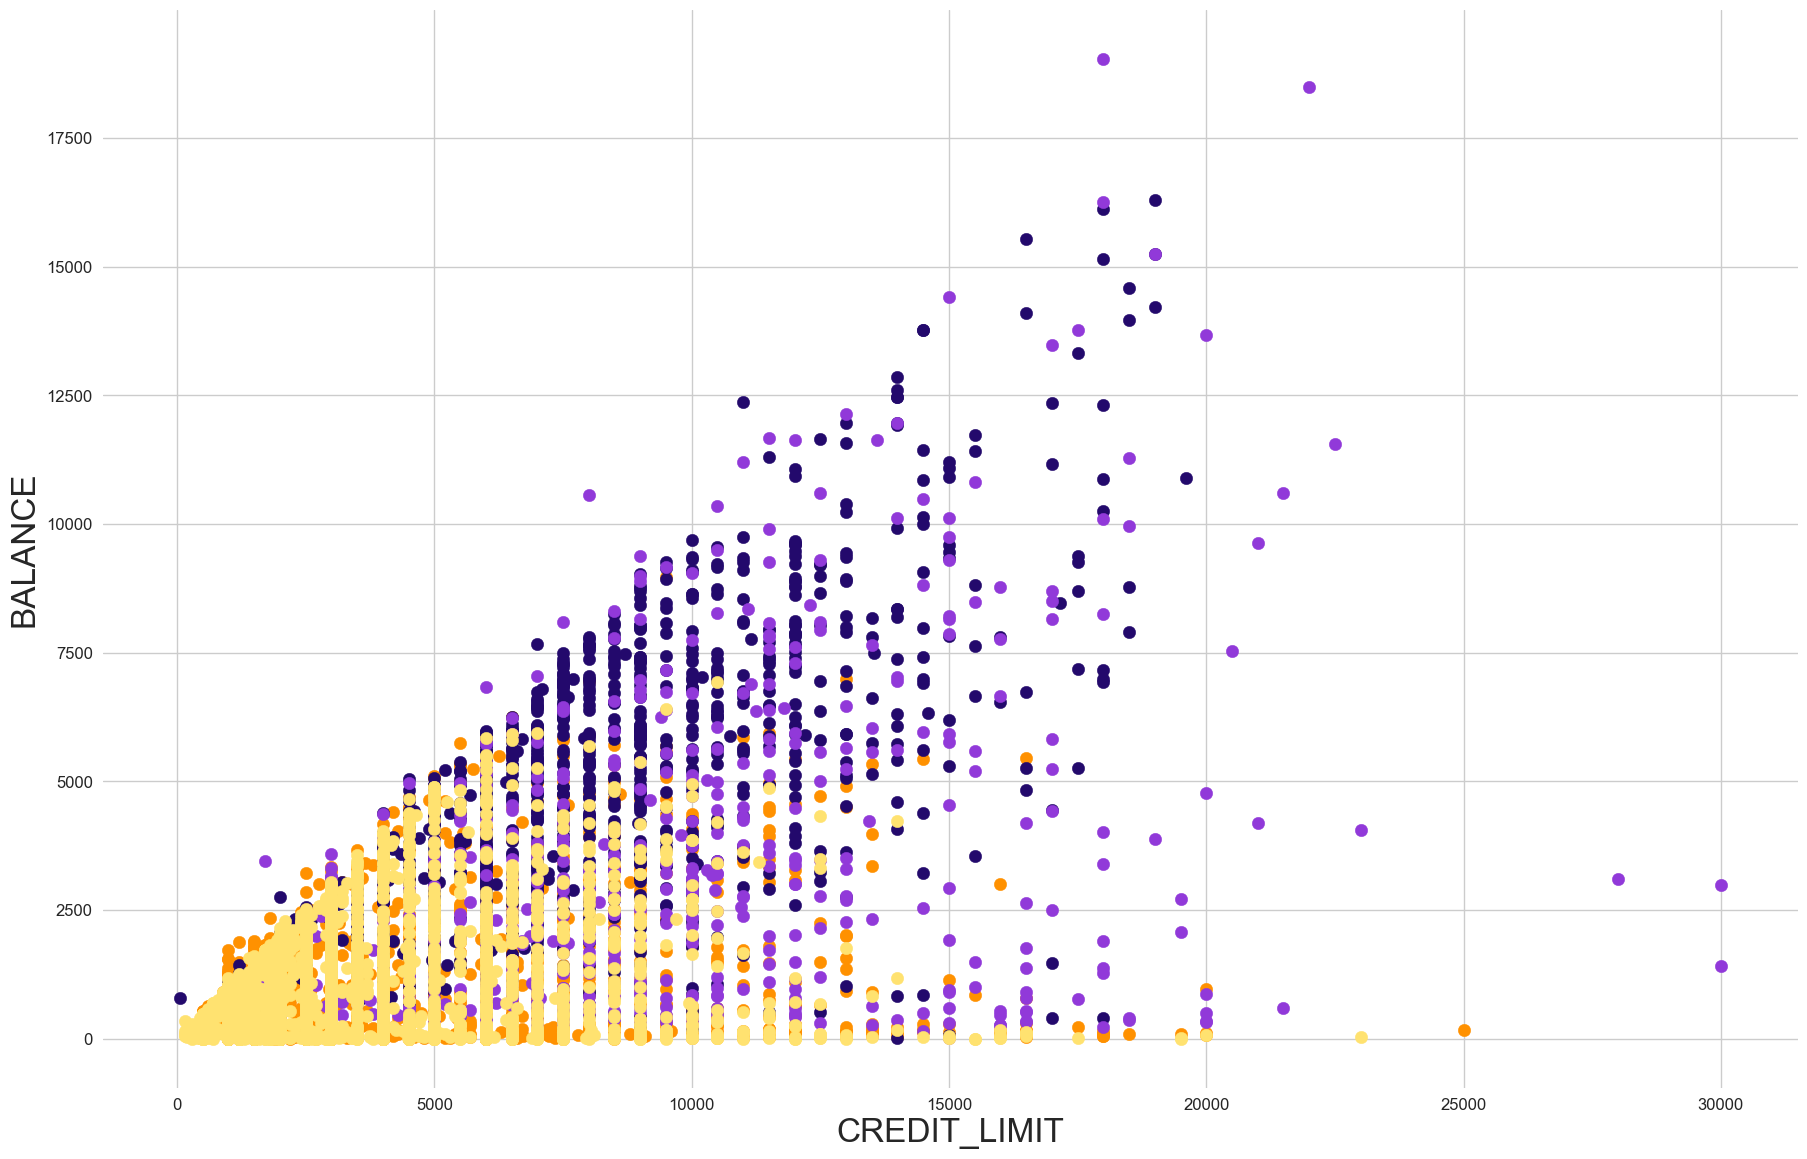

In [31]:

color_pallete=['#ff9100', '#23096c', '#9139d9', '#ffe270']

Credit_Balance = df[['CREDIT_LIMIT', 'BALANCE', 'cluster_result']].copy()
Credit_Balance.loc[:, 'cluster_result'] = Credit_Balance['cluster_result'].astype(str)
tenure = sorted(Credit_Balance['cluster_result'].unique())


fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(7, 7)
ax = fig.add_subplot(gs[:, :7])
ax.set_aspect(1)

for x in range(len(tenure)):
    Credit_Balance_x = Credit_Balance[Credit_Balance['cluster_result'] == tenure[x]]
    ax.scatter(Credit_Balance_x['CREDIT_LIMIT'], Credit_Balance_x['BALANCE'], s=80, color=color_pallete[x])

ax.set_xlabel('CREDIT_LIMIT',fontsize=24)
ax.set_ylabel('BALANCE',fontsize=24 )

for spine in ax.spines.values():
    spine.set_color('None')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


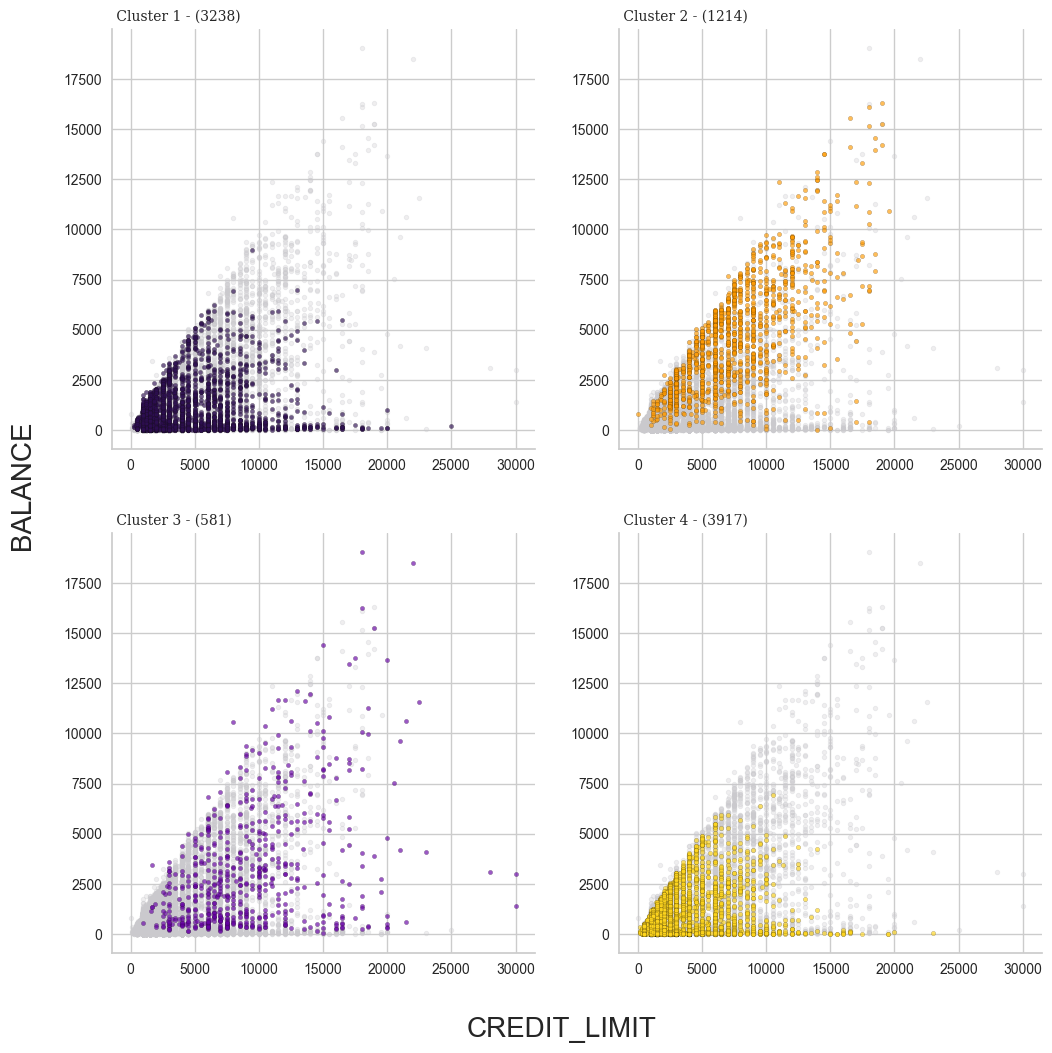

In [32]:

color_pallete=['#ff9100', '#23096c', '#9139d9', '#ffe270']

Credit_Balance = df[['CREDIT_LIMIT', 'BALANCE', 'cluster_result']].copy()
Credit_Balance.loc[:, 'cluster_result'] = Credit_Balance['cluster_result'].astype(str)

fig, sub_axes = plt.subplots(2, 2, figsize=(12, 12))  # 2 rows and 2 columns with increased figsize

for idx, tnr in enumerate(tenure[:4]):  # Limit the iteration to the first 4 tenures
    row = idx // 2  # Calculate the row index
    col = idx % 2  # Calculate the column index

    sub_axes[row, col].scatter(Credit_Balance[Credit_Balance['cluster_result'] != tnr]['CREDIT_LIMIT'],
                               Credit_Balance[Credit_Balance['cluster_result'] != tnr]['BALANCE'],
                               label=tnr, s=10, alpha=0.3, linewidth=0.7, color='#CAC9CD')
    sub_axes[row, col].scatter(Credit_Balance[Credit_Balance['cluster_result'] == tnr]['CREDIT_LIMIT'],
                               Credit_Balance[Credit_Balance['cluster_result'] == tnr]['BALANCE'],
                               color=color_palette[idx], label=tnr, s=10, alpha=0.65,linewidth=0.15, edgecolor='#100C07')

    cnt = (Credit_Balance['cluster_result'] == tnr).sum()
    sub_axes[row, col].set_title(f' {tnr} - ({cnt})', loc='left', fontsize=10, fontfamily='serif')

    sub_axes[row, col].spines['right'].set_visible(False)
    sub_axes[row, col].spines['top'].set_visible(False)

fig.text(0.5, 0.04, '\nCREDIT_LIMIT', ha='center', fontsize=20)
fig.text(0.04, 0.5, 'BALANCE\n', va='center', rotation='vertical', fontsize=20)
   
plt.show()


Cluster 1 (Khách hàng thanh toán đầy đủ): Khách hàng trong nhóm này là những người dùng tích cực của thẻ tín dụng của ngân hàng. Điều này có thể thấy từ tần suất cập nhật số dư thường xuyên và số dư khá cao so với các nhóm khác. Hơn nữa, khách hàng trong nhóm này có mức tiêu dùng trung bình cao hơn so với các nhóm khác, như được thể hiện qua giá trị trung bình của thuộc tính "PURCHASES" và "ONEOFF_PURCHASES". Khách hàng trong nhóm này cũng có xu hướng thực hiện các giao dịch và trả góp, nhưng không sử dụng tiền mặt trước nhiều. Thời gian sử dụng thẻ tín dụng của khách hàng trong nhóm này cũng khá lâu, cho thấy hệ thống đánh giá tín dụng trong nhóm này rất tốt.

Cluster 2 (Khách hàng mới): Khách hàng trong nhóm này thường là những người dùng mới hoặc đang bắt đầu sử dụng thẻ tín dụng. Họ có số dư tương đối nhỏ, thường không cập nhật số dư thường xuyên và thực hiện các giao dịch mua hàng trung bình thấp. Mức trả góp của khách hàng trong nhóm này cũng thấp. Hạn mức tín dụng thấp cũng cho thấy khách hàng không sử dụng thẻ tín dụng để xử lý các giao dịch tín dụng lớn. Tuy nhiên, khách hàng trong nhóm này có xu hướng sử dụng tiền mặt trước khi rút tiền mặt. Điều này có thể cho thấy khách hàng trong nhóm này sử dụng thẻ tín dụng chủ yếu để rút tiền mặt khi cần thiết.

Cluster 3 (Khách hàng trả góp): Khách hàng trong nhóm này sử dụng thẻ tín dụng đặc biệt cho mục đích trả góp. Họ thực hiện số lượng giao dịch mua hàng trung bình cao, đặc biệt là trong hình thức trả góp. Tuy nhiên, khách hàng trong nhóm này không sử dụng tiền mặt trước nhiều và có tần suất tiền mặt trước và số lượng thanh toán tương đối nhỏ. Điều này cho thấy khách hàng trong nhóm này thích sử dụng thẻ tín dụng cho việc trả góp hơn là mua hàng một lần. Họ có xu hướng tránh thanh toán một lần và có thể là những khách hàng thích sử dụng các kế hoạch trả góp hoặc chương trình khuyến mãi trả góp từ ngân hàng.

Cluster 4 (Khách hàng có nhu cầu rút tiền mặt): Khách hàng trong nhóm này có số dư cao, thường cập nhật số dư thường xuyên và có xu hướng sử dụng tiền mặt trước nhiều. Họ có lãi suất thấp nhất và hạn mức tín dụng và số tiền thanh toán cao thứ hai trong bốn nhóm. Tuy nhiên, khách hàng trong nhóm này hiếm khi trả góp hoặc mua hàng một lần và có thời gian sử dụng thẻ tín dụng cao thứ ba trong bốn nhóm. Do đó, có thể kết luận rằng khách hàng trong nhóm này sử dụng thẻ tín dụng chủ yếu để rút tiền hoặc tạo tiền mặt.